## Package call

In [1]:
import psycopg2
import pandas as pd
import psycopg2.extras

import numpy as np
import matplotlib.pyplot as plt

# Extract
Read from excel file

In [5]:
DATA_DIR = "E:/MSc/SUMMER_2023/CSE512-Database/ASSIGNMENTS/"





In [6]:
trans_dim = pd.read_excel(open(DATA_DIR + 'e-commerece_data.xlsx','rb'), sheet_name=1, engine='openpyxl')
item_dim = pd.read_excel(open(DATA_DIR + 'e-commerece_data.xlsx','rb'), sheet_name=2, engine='openpyxl')
coustomer_dim = pd.read_excel(open(DATA_DIR + 'e-commerece_data.xlsx','rb'), sheet_name=3, engine='openpyxl')
time_dim = pd.read_excel(open(DATA_DIR + 'e-commerece_data.xlsx','rb'), sheet_name=4, engine='openpyxl')
store_dim = pd.read_excel(open(DATA_DIR + 'e-commerece_data.xlsx','rb'), sheet_name=5, engine='openpyxl')

## Load
Connect to the database

In [2]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="postgres",
                                           user = "postgres",
                                           password = "nusrat0405",
                                           host = "localhost",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database")
        return self.connection

In [3]:
con = PostgresConnection().getConnection()

successfully connected to database


#### Q1: Find the division/district/year/month wise total_sale_price joining fact table and respective dimension table

In [17]:
# using division and month


cur = con.cursor()

cur.execute(''' SELECT s.division,  SUM(t.total_price) 
FROM ecomdb.fact_table t 
JOIN ecomdb.store_dim s  on   s.store_key= t.store_key 
JOIN ecomdb.time_dim tim on tim.time_key= t.time_key 
where tim.month = '12'
GROUP BY s.division   ''')


records = cur.fetchall()
records


[('BARISAL', 638101.0),
 ('CHITTAGONG', 1665138.0),
 ('DHAKA', 3440676.25),
 ('KHULNA', 952049.75),
 ('RAJSHAHI', 1041201.25),
 ('RANGPUR', 721057.5),
 ('SYLHET', 465256.75)]

####  Visualize the data 

In [19]:
df = pd.DataFrame(list(records), columns=['division', 'sales'])
df.dtypes

division     object
sales       float64
dtype: object

In [23]:
df['sales'] = df['sales'].astype('float64')
df

,division,sales
0,BARISAL,638101.00
1,CHITTAGONG,1665138.00
2,DHAKA,3440676.25
3,KHULNA,952049.75
4,RAJSHAHI,1041201.25
5,RANGPUR,721057.50
6,SYLHET,465256.75


<AxesSubplot:ylabel='sales'>

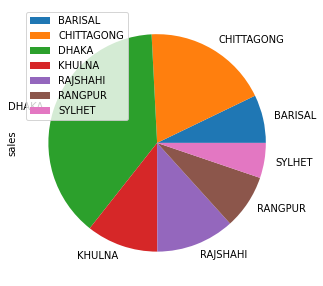

In [26]:
df.plot.pie(y='sales', x='division', figsize=(5, 5))

In [57]:
# using district and year

cur = con.cursor()

cur.execute(''' SELECT s.district,  SUM(t.total_price) 
FROM ecomdb.fact_table t 
JOIN ecomdb.store_dim s  on   s.store_key= t.store_key 
JOIN ecomdb.time_dim tim on tim.time_key= t.time_key 
where tim.year = '2017'
GROUP BY s.district   ''')

records = cur.fetchall()
records

[('BAGERHAT', 190568.0),
 ('BANDARBAN', 145595.25),
 ('BARGUNA', 123760.75),
 ('BARISAL', 405871.25),
 ('BHOLA', 143621.0),
 ('BOGRA', 242162.5),
 ('BRAHMANBARIA', 186582.25),
 ('CHANDPUR', 164482.5),
 ('CHAPAI NABABGANJ', 98180.25),
 ('CHITTAGONG', 1065340.75),
 ('CHUADANGA', 78921.25),
 ('COMILLA', 322634.75),
 ("COX'S BAZAR", 173147.5),
 ('DHAKA', 3330990.75),
 ('DINAJPUR', 275818.5),
 ('FARIDPUR', 189256.5),
 ('FENI', 125937.5),
 ('GAIBANDHA', 143856.5),
 ('GAZIPUR', 99581.25),
 ('GOPALGANJ', 106428.25),
 ('HABIGANJ', 157338.5),
 ('JAMALPUR', 145569.75),
 ('JESSORE', 164959.25),
 ('JHALOKATI', 80137.75),
 ('JHENAIDAH', 115772.75),
 ('JOYPURHAT', 108015.75),
 ('KHAGRACHHARI', 166052.5),
 ('KHULNA', 574770.0),
 ('KISHOREGONJ', 268462.25),
 ('KURIGRAM', 178010.25),
 ('KUSHTIA', 127419.0),
 ('LAKSHMIPUR', 104159.5),
 ('LALMONIRHAT', 106287.5),
 ('MADARIPUR', 87682.75),
 ('MAGURA', 87427.75),
 ('MANIKGANJ', 146950.0),
 ('MAULVIBAZAR', 153545.0),
 ('MEHERPUR', 61254.5),
 ('MUNSHIGANJ', 1

#### Visualize the data¶

In [60]:
df = pd.DataFrame(list(records), columns=['district', 'sales'])
df.dtypes

district     object
sales       float64
dtype: object

In [61]:
df['sales'] = df['sales'].astype('float64')
df

,district,sales
0,BAGERHAT,190568.00
1,BANDARBAN,145595.25
2,BARGUNA,123760.75
3,BARISAL,405871.25
4,BHOLA,143621.00
...,...,...
59,SIRAJGANJ,186007.00
60,SUNAMGANJ,233987.25
61,SYLHET,244772.00
62,TANGAIL,242838.75


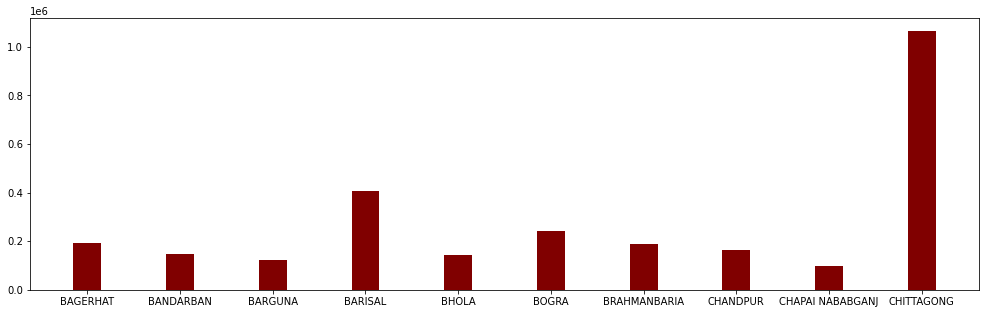

In [78]:

fig = plt.figure(figsize =(17, 5)) 
plt.bar(df['district'].head(10), df['sales'].head(10), color ='maroon',
        width = 0.3)
# plt.xlabel(" total district")
# plt.ylabel("sales per district")
# plt.title("Students enrolled in different courses")
plt.show()

In [11]:


# # division/district => store dim 
# # year/month => time dim
# # total_price => fact table (sum)

#### Q2: Find the customer/bank/transaction(cash/online) wise total_sale_price joining fact table and respective dimension table 

In [115]:
# using customer and transaction(cash)


cur = con.cursor()

cur.execute('''SELECT c.name,  SUM(f.total_price) 
FROM ecomdb.fact_table f 
JOIN ecomdb.coustomer_dim c on c.coustomer_key= f.coustomer_key 
JOIN ecomdb.trans_dim t on t.payment_key= f.payment_key 
where t.trans_type = 'cash'
GROUP BY c.name ''')

records = cur.fetchall()
records

# customer =>  customer dim
# bank/transaction(cash/online) => trans dim
# total price => fact table (sum)

[('-', 254.0),
 ('aafreen fatima', 518.0),
 ('aafrin', 332.0),
 ('aafrin @ dolly', 717.25),
 ('aaftaab husan', 496.5),
 ('aakanksha', 625.0),
 ('aaliya', 1074.0),
 ('aamina', 128.0),
 ('aamir', 176.25),
 ('aamir hussain', 245.0),
 ('aamod & pramod', 234.0),
 ('aanamika misra', 143.0),
 ('aanchal', 1655.5),
 ('aansi devi', 182.25),
 ('aanya @ china', 71.0),
 ('aaradhana @ priyanka', 12.0),
 ('aarifa bano', 112.0),
 ('aarifun bivi', 276.25),
 ('aarti', 14815.25),
 ('aarti @ kajal', 68.0),
 ('aarti @ noni', 99.5),
 ('aarti bunkar', 484.0),
 ('aarti devi', 107.5),
 ('aarti diwakar', 441.0),
 ('aarti pal', 132.0),
 ('aarti rajpoot', 280.0),
 ('aarti shaha', 243.0),
 ('aarti sharma', 175.0),
 ('aarti singh @ pooja', 421.0),
 ('aasa devi', 100.75),
 ('aasha', 997.0),
 ('aasha devi', 260.0),
 ('aasha rani', 96.0),
 ('aashi', 302.0),
 ('aashiya', 416.25),
 ('aashma', 292.0),
 ('aashu', 496.5),
 ('aasish  kumar', 146.25),
 ('aasma', 597.75),
 ('aasmin', 630.0),
 ('aastha thakur', 70.0),
 ('aasu'

#### Visualize the data

In [116]:
df = pd.DataFrame(list(records), columns=['name', 'sales'])
df.dtypes

name      object
sales    float64
dtype: object

In [117]:
df['sales'] = df['sales'].astype('float64')
df.head(10)

,name,sales
0,-,254.00
1,aafreen fatima,518.00
2,aafrin,332.00
3,aafrin @ dolly,717.25
4,aaftaab husan,496.50
5,aakanksha,625.00
6,aaliya,1074.00
7,aamina,128.00
8,aamir,176.25
9,aamir hussain,245.00


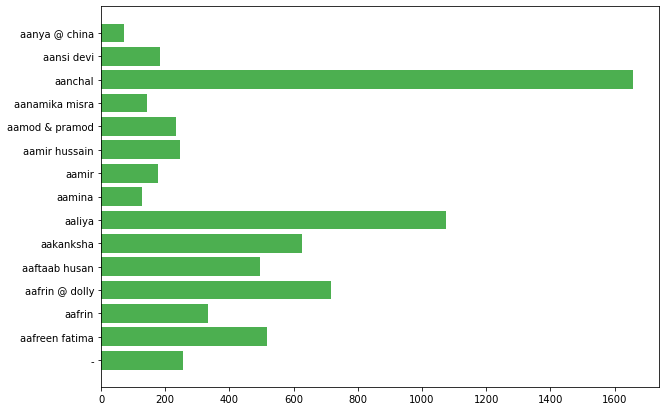

In [118]:
fig = plt.figure(figsize =(10, 7)) 
plt.barh(df['name'].head(15), df['sales'].head(15), color ='#4CAF50')
# plt.xlabel(" total district")
# plt.ylabel("sales per district")
# plt.title("Students enrolled in different courses")
plt.show()

In [54]:
# using customer and transaction(online)


cur = con.cursor()

cur.execute('''SELECT c.name,  SUM(f.total_price) 
FROM ecomdb.fact_table f 
JOIN ecomdb.coustomer_dim c on c.coustomer_key= f.coustomer_key 
JOIN ecomdb.trans_dim t on t.payment_key= f.payment_key 
where t.trans_type = 'mobile'
GROUP BY c.name ''')

cur.fetchall()

[('-', 1937.5),
 ('aafreen fatima', 682.5),
 ('aafrin', 2080.0),
 ('aafrin @ dolly', 1650.5),
 ('aaftaab husan', 1307.75),
 ('aakanksha', 901.0),
 ('aaliya', 1247.75),
 ('aamina', 836.5),
 ('aamir', 586.75),
 ('aamir hussain', 1345.0),
 ('aamod & pramod', 1716.0),
 ('aamrin jahan', 968.0),
 ('aanamika misra', 377.25),
 ('aanchal', 3091.25),
 ('aanik with her son', 691.0),
 ('aansi devi', 411.5),
 ('aanya @ china', 1032.0),
 ('aaradhana @ priyanka', 819.0),
 ('aarifa bano', 1174.0),
 ('aarifun bivi', 550.5),
 ('aarti', 48031.25),
 ('aarti @ kajal', 935.25),
 ('aarti @ noni', 897.5),
 ('aarti bunkar', 631.0),
 ('aarti devi', 2226.5),
 ('aarti diwakar', 645.0),
 ('aarti pal', 565.25),
 ('aarti rajpoot', 959.25),
 ('aarti shaha', 721.75),
 ('aarti sharma', 412.5),
 ('aarti singh @ pooja', 677.5),
 ('aasa devi', 1361.0),
 ('aasha', 3145.5),
 ('aasha devi', 1713.0),
 ('aasha rani', 796.5),
 ('aashi', 551.75),
 ('aashiya', 2267.75),
 ('aashma', 1763.0),
 ('aashu', 1049.5),
 ('aasish  kumar', 

In [61]:
# using customer and bank


cur = con.cursor()

cur.execute('''SELECT t.bank_name,  SUM(f.total_price) 
FROM ecomdb.fact_table f 
JOIN ecomdb.coustomer_dim c on c.coustomer_key= f.coustomer_key 
JOIN ecomdb.trans_dim t on t.payment_key= f.payment_key 
where t.trans_type = 'card'
GROUP BY t.bank_name ''')
records = cur.fetchall()
records


# customer =>  customer dim
# bank/transaction(cash/online) => trans dim
# total price => fact table (sum)

[('AB Bank Limited', 2728515.5),
 ('Bangladesh Commerce Bank Limited', 2730999.25),
 ('Bank Asia Limited', 2687142.75),
 ('Bengal Commercial Bank Ltd', 2704554.25),
 ('BRAC Bank Limited', 2705795.75),
 ('Citizens Bank Limited', 2723215.25),
 ('City Bank Limited', 2713952.5),
 ('Community Bank Bangladesh Limited', 2685751.5),
 ('Dhaka Bank Limited', 2728366.0),
 ('Dutch-Bangla Bank Limited', 2692435.25),
 ('Eastern Bank Limited', 2687182.25),
 ('IFIC Bank Limited', 2699759.75),
 ('Jamuna Bank Limited', 2689886.5),
 ('Meghna Bank Limited', 2700528.5),
 ('Mercantile Bank Limited', 2676578.5),
 ('Midland Bank Limited', 2688430.25),
 ('Modhumoti Bank Limited', 2715279.0),
 ('Mutual Trust Bank Limited', 2670030.5),
 ('National Bank Limited', 2697294.25),
 ('National Credit & Commerce Bank Limited', 2723363.0),
 ('NRB Bank Limited', 2711595.25),
 ('NRB Commercial Bank Ltd', 2692016.25),
 ('NRB Global Bank Ltd', 2700088.0),
 ('One Bank Limited', 2692043.25),
 ('Padma Bank Limited', 2708084.25)

#### Visualize the data

In [104]:
df = pd.DataFrame(list(records), columns=['bank name', 'sales'])
df.dtypes

bank name     object
sales        float64
dtype: object

In [105]:
df['sales'] = df['sales'].astype('float64')
df.head(10)

,bank name,sales
0,-,254.00
1,aafreen fatima,518.00
2,aafrin,332.00
3,aafrin @ dolly,717.25
4,aaftaab husan,496.50
5,aakanksha,625.00
6,aaliya,1074.00
7,aamina,128.00
8,aamir,176.25
9,aamir hussain,245.00


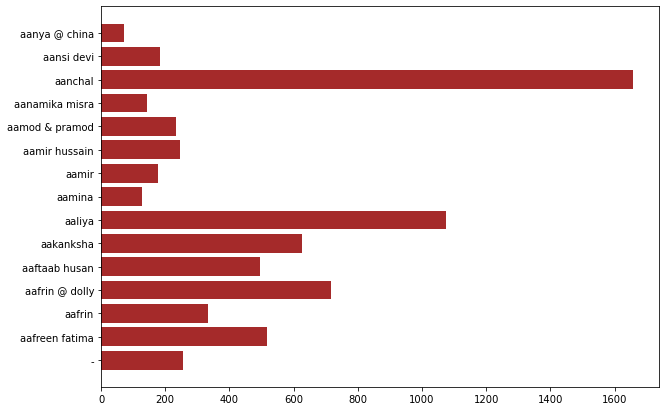

In [112]:
fig = plt.figure(figsize =(10, 7)) 
plt.barh(df['bank name'].head(15), df['sales'].head(15), color ='brown')
# plt.xlabel(" total district")
# plt.ylabel("sales per district")
# plt.title("Students enrolled in different courses")
plt.show()

#### Q3: Total sales in Barisal for item 'Pepsi - 12 oz cans'

In [119]:

cur = con.cursor()
cur.execute(''' SELECT SUM(f.total_price) 
FROM ecomdb.fact_table f 
JOIN ecomdb.store_dim s on s.store_key= f.store_key 
JOIN ecomdb.item_dim i on i.item_key= f.item_key 
where s.district = 'BARISAL' and  i.item_name = 'Pepsi - 12 oz cans' ''')


records = cur.fetchall()
records


[(12982.5,)]

#### Q4: Total sales in 2015 for supplier 'BIGSO AB'

In [87]:

cur = con.cursor()

cur.execute(''' SELECT SUM(f.total_price) 
FROM ecomdb.fact_table f 
JOIN ecomdb.time_dim t on t.time_key = f.time_key 
JOIN ecomdb.item_dim i on i.item_key= f.item_key 
where t.year = '2015' and  i.supplier = 'BIGSO AB' ''')

cur.fetchall()

[(1685691.75,)]

#### Q5: Total sales of Dhaka in 2015

In [93]:

cur = con.cursor()

cur.execute(''' SELECT SUM(f.total_price) 
FROM ecomdb.fact_table f
JOIN ecomdb.store_dim s on s.store_key= f.store_key 
JOIN ecomdb.time_dim t on t.time_key = f.time_key
where s.division = 'DHAKA' and  t.year = '2015' ''')

cur.fetchall()

[(5865078.75,)]

#### Q6: For each store(item supplier), what are the top three products offered that are most often purchased?
S1-> item1 -> quantity_sales

S1-> item2 -> quantity_sales

S1-> item3 -> quantity_sales

In [11]:
cur = con.cursor()

cur.execute(''' 
select * from
(
SELECT i.supplier, i.item_name, SUM(f.quantity) as quantity_sales, row_number() over(partition by i.supplier order by SUM(f.quantity) desc) rowid 
FROM ecomdb.fact_table f 
JOIN ecomdb.item_dim i on i.item_key= f.item_key 
JOIN ecomdb.store_dim s on s.store_key= f.store_key  
group by  i.supplier, i.item_name
order by i.supplier, rowid, SUM(f.quantity) desc	
) x
where rowid <= 3
order by x.supplier, rowid ''')


records = cur.fetchall()
records




[('BIGSO AB', 'Nat.Valley PeanutButter Protein Bars', 23958, 1),
 ('BIGSO AB', '100% Juice Box Variety 6.75 oz ', 23425, 2),
 ('BIGSO AB', 'Red Bull Sugar Free 8.4 oz', 23343, 3),
 ('Bolsius Boxmeer', 'A&W Root Beer - 12 oz cans', 23623, 1),
 ('Bolsius Boxmeer', 'Waterloo Sparkling Original 12oz', 23289, 2),
 ('Bolsius Boxmeer', "Reese's Pieces Peanutbutter Candy", 23273, 3),
 ('CHERRY GROUP CO.,LTD', 'Wonderful Pistachios (in shell)', 23454, 1),
 ('CHERRY GROUP CO.,LTD', 'Clorox Bleach Large Jugs', 23158, 2),
 ('CHERRY GROUP CO.,LTD', 'Topo Chico 20oz plastic', 23108, 3),
 ('CHROMADURLIN S.A.S', 'A&W Root Beer Diet - 12 oz cans', 23182, 1),
 ('CHROMADURLIN S.A.S', 'Pop-Tarts, Brown Sugar Cinnamon ', 23165, 2),
 ('CHROMADURLIN S.A.S', "Reese's Peanutbutter Cups 2/pk", 23160, 3),
 ('DENIMACH LTD', 'Gatorade Variety 20 oz ', 23474, 1),
 ('DENIMACH LTD', 'Large Trash Bags Black 33 gal', 23435, 2),
 ('DENIMACH LTD', 'Charmin Ultra Bath Tissue', 23357, 3),
 ('Friedola 1888 GmbH', 'Cascade G

#### Visualize the data

In [12]:
df = pd.DataFrame(list(records), columns=['store', 'products', 'quantity sales', 'row_id'])
df.dtypes

store             object
products          object
quantity sales     int64
row_id             int64
dtype: object

In [13]:
df['quantity sales'] = df['quantity sales'].astype('float64')
df.head(10)

,store,products,quantity sales,row_id
0,BIGSO AB,Nat.Valley PeanutButter Protein Bars,23958.0,1
1,BIGSO AB,100% Juice Box Variety 6.75 oz,23425.0,2
2,BIGSO AB,Red Bull Sugar Free 8.4 oz,23343.0,3
3,Bolsius Boxmeer,A&W Root Beer - 12 oz cans,23623.0,1
4,Bolsius Boxmeer,Waterloo Sparkling Original 12oz,23289.0,2
5,Bolsius Boxmeer,Reese's Pieces Peanutbutter Candy,23273.0,3
6,"CHERRY GROUP CO.,LTD",Wonderful Pistachios (in shell),23454.0,1
7,"CHERRY GROUP CO.,LTD",Clorox Bleach Large Jugs,23158.0,2
8,"CHERRY GROUP CO.,LTD",Topo Chico 20oz plastic,23108.0,3
9,CHROMADURLIN S.A.S,A&W Root Beer Diet - 12 oz cans,23182.0,1


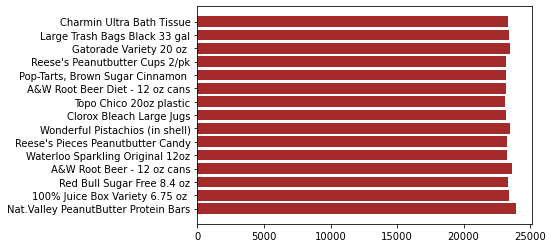

In [9]:


# plt.bar(range(len(df['products'].head(10))), df['products'].head(10))
# plt.bar(range(len(df['quantity sales'].head(10))), df['quantity sales'].head(10), bottom=df['products'].head(10))
# plt.show()



#fig = plt.figure(figsize =(10, 7)) 
plt.barh(df['products'].head(15), df['quantity sales'].head(15), color ='brown')
# plt.xlabel(" total district")
# plt.ylabel("sales per district")
# plt.title("Students enrolled in different courses")
plt.show()

#### Q7: What products have been sold through card or mobile since X days?
input: X = 5 days

output: [item1, item2, item3, ...........]

In [163]:
cur = con.cursor()

cur.execute(''' SELECT x.item_name 
FROM 
(SELECT i.item_name, SUM(f.total_price) 
FROM ecomdb.fact_table f 
JOIN ecomdb.item_dim i on i.item_key= f.item_key 
JOIN ecomdb.trans_dim t on t.payment_key= f.payment_key
JOIN ecomdb.time_dim td on td.time_key = f.time_key
where (t.trans_type = 'card' or t.trans_type = 'mobile') and td.day <='5'
group by i.item_name)x 
group by x.item_name  ''')


records = cur.fetchall()
records


[('100% Juice Box Variety 6.75 oz ',),
 ('A&W Root Beer - 12 oz cans',),
 ('A&W Root Beer Diet - 12 oz cans',),
 ('Advil 2 pill packets',),
 ('All Purpose Cleaner 409 Spray',),
 ('Altoids Small Packs Variety',),
 ('Apple Sauce Variety GoGO Squeeze 3.2oz',),
 ('AquaFina Purified Drinking Water 16oz',),
 ('Austin Cookie Cracker Variety',),
 ('Austin Toasty Crackers w/ PBtr',),
 ('Baked Chips Variety Mix Frito',),
 ("Barq's Root Beer - 12 oz cans",),
 ('Belvita Hard Biscuits Blueberry',),
 ('Belvita Hard Biscuits Cinnamon',),
 ('Belvita Protein Oats Soft Biscuit',),
 ('Blue Diamond Almonds Rstd, Sltd',),
 ('Bounty Paper Towels Select a Size ',),
 ('Breath Savers Peppermints 12/roll ',),
 ('Brisk Lemon Iced Tea - 12 oz cans',),
 ('Cascade Gel Packs Dishwasher',),
 ('Cascade Gel w/ Dawn Dishwasher',),
 ('Charmin Ultra Bath Tissue',),
 ('Cheese and Peanut Butter Crackers',),
 ("Cheetos Flamin' Hot 1 oz",),
 ('Cheez It Original Crackers 1.5oz',),
 ('Cheez It White Cheddar 1.5 oz',),
 ('Cherry

#### Visualize the data¶

In [164]:
df = pd.DataFrame(list(records), columns=['products'])
df.dtypes

products    object
dtype: object

#### Q8: What season(quarter) is the worst for each product item? As example,

item1-> q1

item2-> q2

In [14]:
cur = con.cursor()

cur.execute('''select * from
(
SELECT x.item_name, x.quarter, MIN(x.total_sold) as min_total_sold, row_number() over(partition by x.item_name order by MIN(x.total_sold) asc) rowid 
FROM
(
SELECT i.item_name, t.quarter, sum(f.total_price) as total_sold
FROM ecomdb.fact_table f 
JOIN ecomdb.item_dim i on i.item_key= f.item_key 
JOIN ecomdb.time_dim t on t.time_key = f.time_key
group by i.item_name, t.quarter
) x
group by x.item_name, x.quarter
order by x.item_name asc, rowid, MIN(x.total_sold) asc
) y
where rowid = 1
order by y.item_name, rowid''')

records = cur.fetchall()
records



# SELECT x.item_name, x.quarter, MIN(x.total_sold) as min_total_sold
# FROM
# (SELECT i.item_name, t.quarter, sum(f.total_price) as total_sold
# FROM ecomdb.fact_table f 
# JOIN ecomdb.item_dim i on i.item_key= f.item_key 
# JOIN ecomdb.time_dim t on t.time_key = f.time_key
# group by i.item_name, t.quarter) x
# group by x.item_name, x.quarter
# order by x.item_name asc


[('100% Juice Box Variety 6.75 oz ', 'Q1', 85470.0, 1),
 ('A&W Root Beer - 12 oz cans', 'Q2', 65952.5, 1),
 ('A&W Root Beer Diet - 12 oz cans', 'Q4', 37725.75, 1),
 ('Advil 2 pill packets', 'Q1', 76342.0, 1),
 ('All Purpose Cleaner 409 Spray', 'Q1', 95850.0, 1),
 ('Altoids Small Packs Variety', 'Q3', 65592.0, 1),
 ('Apple Sauce Variety GoGO Squeeze 3.2oz', 'Q4', 78190.0, 1),
 ('AquaFina Purified Drinking Water 16oz', 'Q1', 47691.0, 1),
 ('Austin Cookie Cracker Variety', 'Q1', 78358.0, 1),
 ('Austin Toasty Crackers w/ PBtr', 'Q2', 73836.0, 1),
 ('Baked Chips Variety Mix Frito', 'Q2', 86896.0, 1),
 ("Barq's Root Beer - 12 oz cans", 'Q3', 37840.5, 1),
 ('Belvita Hard Biscuits Blueberry', 'Q4', 70005.0, 1),
 ('Belvita Hard Biscuits Cinnamon', 'Q1', 74100.0, 1),
 ('Belvita Protein Oats Soft Biscuit', 'Q3', 73024.0, 1),
 ('Blue Diamond Almonds Rstd, Sltd', 'Q4', 32844.0, 1),
 ('Bounty Paper Towels Select a Size ', 'Q4', 146562.0, 1),
 ('Breath Savers Peppermints 12/roll ', 'Q2', 87872.0, 1),

#### Visualize the data

In [15]:
df = pd.DataFrame(list(records), columns=['item name', 'season', 'total sale', 'row_id'])
df.dtypes

item name      object
season         object
total sale    float64
row_id          int64
dtype: object

In [16]:
df['quantity sales'] = df['total sale'].astype('float64')
df.head(10)

,item name,season,total sale,row_id,quantity sales
0,100% Juice Box Variety 6.75 oz,Q1,85470.00,1,85470.00
1,A&W Root Beer - 12 oz cans,Q2,65952.50,1,65952.50
2,A&W Root Beer Diet - 12 oz cans,Q4,37725.75,1,37725.75
3,Advil 2 pill packets,Q1,76342.00,1,76342.00
4,All Purpose Cleaner 409 Spray,Q1,95850.00,1,95850.00
5,Altoids Small Packs Variety,Q3,65592.00,1,65592.00
6,Apple Sauce Variety GoGO Squeeze 3.2oz,Q4,78190.00,1,78190.00
7,AquaFina Purified Drinking Water 16oz,Q1,47691.00,1,47691.00
8,Austin Cookie Cracker Variety,Q1,78358.00,1,78358.00
9,Austin Toasty Crackers w/ PBtr,Q2,73836.00,1,73836.00


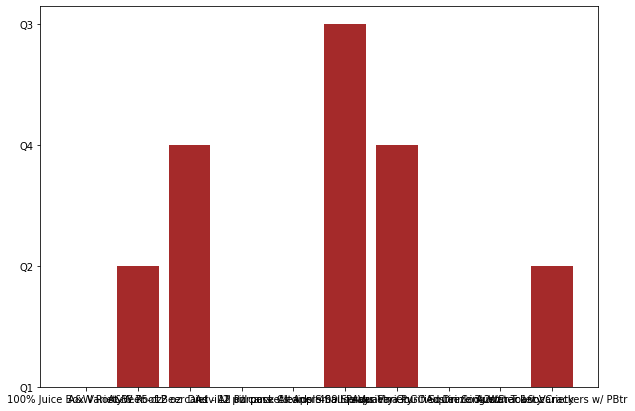

In [18]:
fig = plt.figure(figsize =(10, 7)) 
plt.bar(df['item name'].head(10), df['season'].head(10), color ='brown')
# plt.xlabel(" total district")
# plt.ylabel("sales per district")
# plt.title("Students enrolled in different courses")
plt.show()


#### Q9: Break down the total sales of items geographically (division-wise).
item1-> division1->total_sales

item1-> division2->total_sales

In [194]:
cur = con.cursor()

cur.execute(''' SELECT i.item_name, s.division, sum(f.total_price)
FROM ecomdb.fact_table f 
JOIN ecomdb.item_dim i on i.item_key= f.item_key 
JOIN ecomdb.store_dim s on s.store_key= f.store_key 
group by i.item_name, s.division
order by i.item_name desc ''')

records = cur.fetchall()
records


[('Zoo Animal Cookies/Crackers', 'BARISAL', 24178.0),
 ('Zoo Animal Cookies/Crackers', 'CHITTAGONG', 55762.0),
 ('Zoo Animal Cookies/Crackers', 'DHAKA', 118286.0),
 ('Zoo Animal Cookies/Crackers', 'KHULNA', 35434.0),
 ('Zoo Animal Cookies/Crackers', 'RAJSHAHI', 37100.0),
 ('Zoo Animal Cookies/Crackers', 'RANGPUR', 25186.0),
 ('Zoo Animal Cookies/Crackers', 'SYLHET', 14728.0),
 ('Yoplait Original Yogurt Variety Pack ', 'BARISAL', 19980.0),
 ('Yoplait Original Yogurt Variety Pack ', 'CHITTAGONG', 53652.0),
 ('Yoplait Original Yogurt Variety Pack ', 'DHAKA', 99444.0),
 ('Yoplait Original Yogurt Variety Pack ', 'KHULNA', 27876.0),
 ('Yoplait Original Yogurt Variety Pack ', 'RAJSHAHI', 30636.0),
 ('Yoplait Original Yogurt Variety Pack ', 'RANGPUR', 22332.0),
 ('Yoplait Original Yogurt Variety Pack ', 'SYLHET', 15264.0),
 ('Wonderful Pistachios (in shell)', 'BARISAL', 38082.0),
 ('Wonderful Pistachios (in shell)', 'CHITTAGONG', 96074.0),
 ('Wonderful Pistachios (in shell)', 'DHAKA', 196812.0

#### Visualize the data

In [197]:
df = pd.DataFrame(list(records), columns=['item name', 'division', 'total sales'])
df.dtypes

item name       object
division        object
total sales    float64
dtype: object

In [200]:
df['total sales'] = df['total sales'].astype('float64')
df.head(10)

,item name,division,total sales,quantity sales
0,Zoo Animal Cookies/Crackers,BARISAL,24178.0,24178.0
1,Zoo Animal Cookies/Crackers,CHITTAGONG,55762.0,55762.0
2,Zoo Animal Cookies/Crackers,DHAKA,118286.0,118286.0
3,Zoo Animal Cookies/Crackers,KHULNA,35434.0,35434.0
4,Zoo Animal Cookies/Crackers,RAJSHAHI,37100.0,37100.0
5,Zoo Animal Cookies/Crackers,RANGPUR,25186.0,25186.0
6,Zoo Animal Cookies/Crackers,SYLHET,14728.0,14728.0
7,Yoplait Original Yogurt Variety Pack,BARISAL,19980.0,19980.0
8,Yoplait Original Yogurt Variety Pack,CHITTAGONG,53652.0,53652.0
9,Yoplait Original Yogurt Variety Pack,DHAKA,99444.0,99444.0


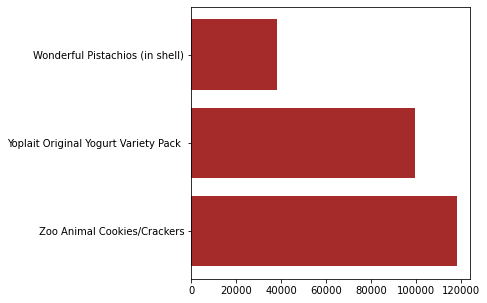

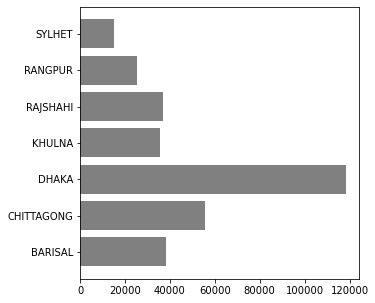

In [205]:
fig = plt.figure(figsize =(5, 5)) 
plt.barh(df['item name'].head(15), df['total sales'].head(15), color ='brown')
plt.show()

fig = plt.figure(figsize =(5, 5)) 
plt.barh(df['division'].head(15), df['total sales'].head(15), color ='grey')
# plt.xlabel(" total district")
# plt.ylabel("sales per district")
# plt.title("Students enrolled in different courses")
plt.show()

#### Q10: What are the average sales of products sales per store monthly?
S1->M1-> avg_sales

s1-> M2 -> avg_sales

In [206]:
cur = con.cursor()

cur.execute(''' SELECT i.supplier,  td.month, avg(f.total_price)
FROM ecomdb.fact_table f 
JOIN ecomdb.item_dim i on i.item_key= f.item_key 
JOIN ecomdb.time_dim td on td.time_key = f.time_key
group by i.supplier, td.month
order by i.supplier, td.month asc ''')

records = cur.fetchall()
records

[('BIGSO AB', '1', 119.69589681440443),
 ('BIGSO AB', '10', 120.41189241346038),
 ('BIGSO AB', '11', 118.60735708165014),
 ('BIGSO AB', '12', 120.29326168337157),
 ('BIGSO AB', '2', 120.50479243786357),
 ('BIGSO AB', '3', 119.23176560840317),
 ('BIGSO AB', '4', 117.75505689001264),
 ('BIGSO AB', '5', 118.51862966484431),
 ('BIGSO AB', '6', 119.27643171806167),
 ('BIGSO AB', '7', 119.24802003261122),
 ('BIGSO AB', '8', 118.13369963369964),
 ('BIGSO AB', '9', 118.85876179831098),
 ('Bolsius Boxmeer', '1', 104.77929388188142),
 ('Bolsius Boxmeer', '10', 106.0727703757052),
 ('Bolsius Boxmeer', '11', 106.96655591775325),
 ('Bolsius Boxmeer', '12', 106.20986043689321),
 ('Bolsius Boxmeer', '2', 105.99348490892169),
 ('Bolsius Boxmeer', '3', 105.77266483516483),
 ('Bolsius Boxmeer', '4', 105.95010582669323),
 ('Bolsius Boxmeer', '5', 106.46366536689118),
 ('Bolsius Boxmeer', '6', 108.36575838414635),
 ('Bolsius Boxmeer', '7', 105.37763700648203),
 ('Bolsius Boxmeer', '8', 106.24988222824167)

In [207]:
df = pd.DataFrame(list(records), columns=['supplier', 'month', 'total sales'])
df.dtypes

supplier        object
month           object
total sales    float64
dtype: object

In [208]:
df['total sales'] = df['total sales'].astype('float64')
df.head(10)

,supplier,month,total sales
0,BIGSO AB,1,119.695897
1,BIGSO AB,10,120.411892
2,BIGSO AB,11,118.607357
3,BIGSO AB,12,120.293262
4,BIGSO AB,2,120.504792
5,BIGSO AB,3,119.231766
6,BIGSO AB,4,117.755057
7,BIGSO AB,5,118.518630
8,BIGSO AB,6,119.276432
9,BIGSO AB,7,119.248020


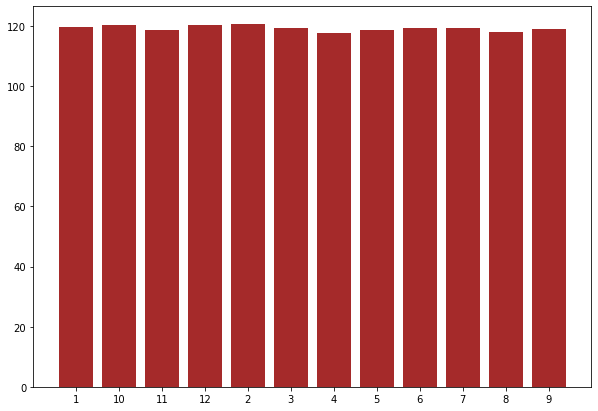

In [212]:
fig = plt.figure(figsize =(10, 7)) 
plt.bar(df['month'].head(15), df['total sales'].head(15), color ='brown')
# plt.xlabel(" total district")
# plt.ylabel("sales per district")
# plt.title("Students enrolled in different courses")
plt.show()



In [ ]:
# first plot with X and Y data
plt.plot(x, y)
  
x1 = [2, 4, 6, 8]
y1 = [3, 5, 7, 9]
  
# second plot with x1 and y1 data
plt.plot(x1, y1, '-.')
  
plt.xlabel("X-axis data")
plt.ylabel("Y-axis data")
plt.title('multiple plots')
plt.show()

In [ ]:
# -----------QUESTION 10-----
# SELECT x.supplier, avg(x.weekly_sum) as avg_monthly_sum
# from  
# (SELECT i.supplier,  td.week, SUM(f.total_price) as weekly_sum
# FROM ecomdb.fact_table f 
# JOIN ecomdb.item_dim i on i.item_key= f.item_key 
# JOIN ecomdb.time_dim td on td.time_key = f.time_key
# group by i.supplier, td.week
# ) x
# group by x.supplier 


# With x as
# (SELECT i.supplier,  td.week, SUM(f.total_price) as weekly_sum
# FROM ecomdb.fact_table f 
# JOIN ecomdb.item_dim i on i.item_key= f.item_key 
# JOIN ecomdb.time_dim td on td.time_key = f.time_key
# group by i.supplier, td.week)

# select supplier, SUM(weekly_sum) as monthly_sum
# from x
# group by supplier

In [9]:
cur = con.cursor()
# select_stmt = '''SELECT * FROM trans_dim'''
cur.execute('''SELECT * FROM ecomdb.fact_table''')

cur.fetchall()

[('P026', 'C004510', 'T049189', 'I00177', 'S00307', 1, 'ct', 35.0, 35.0),
 ('P022', 'C008967', 'T041209', 'I00248', 'S00595', 1, 'rolls', 26.0, 26.0),
 ('P030', 'C007261', 'T03633', 'I00195', 'S00496', 8, 'ct', 12.5, 100.0),
 ('P032', 'C007048', 'T084631', 'I00131', 'S0086', 8, 'ct', 14.0, 112.0),
 ('P014', 'C006430', 'T071276', 'I00050', 'S00488', 8, 'cans', 8.0, 64.0),
 ('P006', 'C007574', 'T026950', 'I00058', 'S00328', 5, 'bottles', 22.0, 110.0),
 ('P023', 'C005695', 'T096704', 'I00075', 'S00196', 2, 'cans', 15.5, 31.0),
 ('P027', 'C008728', 'T010756', 'I00188', 'S0010', 1, 'ct', 14.0, 14.0),
 ('P025', 'C002764', 'T017598', 'I00017', 'S00164', 11, 'cans', 6.75, 74.25),
 ('P019', 'C003128', 'T048812', 'I00133', 'S00640', 10, 'ct', 15.0, 150.0),
 ('P018', 'C006613', 'T078755', 'I00065', 'S00540', 8, 'bottles', 20.0, 160.0),
 ('P030', 'C009139', 'T037206', 'I00023', 'S0032', 10, 'cans', 6.75, 67.5),
 ('P003', 'C000849', 'T045267', 'I00237', 'S00631', 3, 'ct', 16.0, 48.0),
 ('P016', 'C0